# [Python paketi ili moduli](https://pypi.org/)

Python fajlovi i kompilacije tih fajlova koji sadrze klase i metode za neku specificnu vrstu proracuna se nazivaju python paketi ili python moduli. Njih se moze vrlo lako pronaci na internetu, a isto tako mozemo praviti svoje module za posebnu namjenu. Obicno je prije razvijanja takvih novih modula korisno pretraziti internet, jer je moguce da je neko vec imao ideju i razvio slican modul koji sluzi u iste svrhe.

Neki od tih paketa, koje upoznajemo u ovoj svesci su:
- [Numpy](https://numpy.org/) - osnovni paket za matematicke proracune
- [Matplotlib](https://matplotlib.org/) i drugi paket za vizualizaciju
- [Pandas](https://pandas.pydata.org/) - analiza podataka

Prvo cemo nauciti kako se uvozi, drugim rjecima importuje neki modul, na primjeru jednostavnog modula koji je Milica razvila i spremljen je u fajlu pod imenom `konverzija_temp.py`

In [9]:
from konverzija_temp import Konverzija as konv

# koje metode su nam na raspolaganju
help(konv)

Help on class Konverzija in module konverzija_temp:

class Konverzija(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  farenhajt_u_celzijus(temp_f)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [11]:
temp_fahr = 90

konv.farenhajt_u_celzijus(temp_fahr)

32.22222222222222

# Numpy modul

In [14]:
# numpy smo vec instalirali putem anakonda paketa
import numpy as np

Osnovne karakteristike numpy modula:

- Primarna klasa u numpy modulu je "ndarray"
- "ndarray" je multidimenzionalni homogeni array (matrica) fiksne velicne, naravno moze biti i jednodimenzionalna i prazna
- Svaki element je istog tipa. 
- Dimenzije array-a se nazivaju ose, odnosno axis. Index u svakoj dimenziji je nenegativan intedzer.
- Instancira se, obicno, koristeci metod koji vraca odredjeni tip matrice

In [16]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [17]:
type(a)

numpy.ndarray

In [19]:
b = np.ones((3,2))
b

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [40]:
b.shape

(3, 2)

In [41]:
b.dtype

dtype('float64')

In [42]:
b.ndim

2

In [43]:
c = np.zeros((1,3), int)
c

array([[0, 0, 0]])

In [44]:
type(c)

numpy.ndarray

In [45]:
c.dtype

dtype('int32')

In [46]:
# "linspace" kreira jednodimenzionalni array od arg1 do arg2, duzine arg3

d = np.linspace(1,5,11)
d

array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ])

## Slicno kao rad sa listama, numpy array se moze indeksovati, rezati i iterovati

In [90]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [63]:
a[4:8]

array([4, 5, 6, 7])

In [79]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [72]:
a[::-2]

array([9, 7, 5, 3, 1])

In [75]:
a[2:-2]

array([2, 3, 4, 5, 6, 7])

In [92]:
a[:6:2] = -1000

In [94]:
# Tip svih elemenata se takodje moze specificirati putem "dtype" atributa

In [119]:
x = np.zeros((2,))

In [122]:
y = x.copy()
y.dtype
y += np.array([1.0, 1.0])
y += np.array([1.0, 1.0])
y

array([4., 4.])

In [123]:
a = np.array([[1, 2], [3, 4]])

b = np.array([[2, 3], [4, 5]])

a + b

array([[3, 5],
       [7, 9]])

In [129]:
# proizvod svih elemenata sa istim koordinatama
np.multiply(a, b)

array([[ 2,  6],
       [12, 20]])

In [130]:
np.multiply(a, b) == (a * b)

array([[ True,  True],
       [ True,  True]])

In [131]:
(np.multiply(a, b) == (a * b)).all()

True

In [136]:
# matricni proizvod
np.dot(a,b)

array([[10, 13],
       [22, 29],
       [34, 45]])

In [137]:
a = np.array([[1, 2], [3, 4], [5, 6]])

b = np.array([[2, 3], [4, 5]])

In [138]:
np.dot(a,b)

array([[10, 13],
       [22, 29],
       [34, 45]])

In [140]:
# a ovo naravno ne moze usljed dimenzija matrica
np.dot(b,a)

ValueError: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

In [ ]:
# Univerzalne funkcije u numpy paketu su znacajno brze nego petlje

In [152]:
a = np.random.random((500,500))
b = np.random.random((500,500))

In [153]:
a

array([[0.99127555, 0.21945058, 0.53640167, ..., 0.51416545, 0.94053192,
        0.29055022],
       [0.62401499, 0.93862023, 0.29482617, ..., 0.56685249, 0.91541657,
        0.99724573],
       [0.63433564, 0.68236627, 0.0771894 , ..., 0.74420198, 0.8477845 ,
        0.11685227],
       ...,
       [0.18142059, 0.47616279, 0.53574002, ..., 0.00243439, 0.3674495 ,
        0.11756261],
       [0.36253896, 0.81480223, 0.17941501, ..., 0.494328  , 0.58959263,
        0.82814455],
       [0.18574862, 0.81758961, 0.53741282, ..., 0.40719701, 0.48522957,
        0.50630857]])

In [154]:
def mult1(a,b):
    return a * b

def mult2(a,b):
    c = np.empty(a.shape)
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            c[i,j] = a[i,j] * b[i,j]
    return c

In [156]:
timeit mult1(a,b)

975 µs ± 139 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [157]:
timeit mult2(a,b)

163 ms ± 54.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [160]:
# numpy se dobro snalazi sa array-ima razlicitih dimenzija
# Ali ponekad je dobro provjeriti da li je operacija odradila bas ono sto ste htjeli

a=np.array([1,2,3.])

a + 2

array([3., 4., 5.])

In [161]:
b=np.array([10,20,30.,40])

a * b

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

In [162]:
a = a.reshape(3,1)

a

array([[1.],
       [2.],
       [3.]])

In [163]:
a * b

array([[ 10.,  20.,  30.,  40.],
       [ 20.,  40.,  60.,  80.],
       [ 30.,  60.,  90., 120.]])

In [170]:
# numpy arrays se mogu i porediti koristeci logicke operacije

a = np.array([1, 3, 0], float)

b = np.array([0, 3, 2], float)

In [171]:
a > b

array([ True, False, False])

In [172]:
a == b

array([False,  True, False])

In [173]:
c = a <= b
c

array([False,  True,  True])

In [174]:
np.logical_and(a > 0, a < 3)

array([ True, False, False])

In [175]:
np.logical_or(a,b)

array([ True,  True,  True])

In [179]:
a = np.array([1, 3, 0, -5, 0], float)
# pronadji sve indekse matrice u kojima vrijednost nije 0
np.where(a != 0)

(array([0, 1, 3], dtype=int64),)

In [180]:
# koje su to vrijednosti
a[np.where(a != 0)]

array([ 1.,  3., -5.])

In [182]:
# isto tako
a[a != 0]

array([ 1.,  3., -5.])

In [184]:
np.where(a != 0.0, 1 / a, a)

C:\Users\Slavenka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([ 1.        ,  0.33333333,  0.        , -0.2       ,  0.        ])

In [186]:
x = np.arange(9.).reshape(3, 3)
x

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [190]:
x > 5

array([[False, False, False],
       [False, False, False],
       [ True,  True,  True]])

## Statisticke metode u numpy

ndarray objkti imaju osnovne statisticke funkcije (mean - srednja vrijednost, median - medijana, standard deviation - standardna devijacija, etc.).

In [252]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [253]:
np.mean(a)

2.5

In [254]:
np.mean(a, axis=0)

array([2., 3.])

In [255]:
np.mean(a, axis=1)

array([1.5, 3.5])

In [256]:
np.std(a)

1.118033988749895

In [257]:
# weights - ponder, koeficijent kojim se mnozi svaki clan matrice
np.average(range(1,11), weights=np.arange(10,0,-1))

4.0

In [258]:
# sto je ekvivalentno ovom:
np.sum(range(1,11)*np.arange(10,0,-1))/sum(np.arange(10,0,-1))

4.0

## Slucajni (random) brojevi

Numpy *random* modul sadrzi genaratore slucajnih brojeva, kao i najkoristenije funkcije raspodjele vjerovatnoce (probability distribution functions)
Komplikovanije distribucije se mogu naci u sastavu [**scipy**](https://docs.scipy.org/doc/scipy/reference/stats.html) modula.


In [269]:
np.random.rand(5)

array([0.97222233, 0.63564788, 0.00292163, 0.29315446, 0.89461325])

In [271]:
np.random.randint(5, 15)

8

In [272]:
np.random.normal(1.5, 4.0)

4.800595644088505

# Vizualizacija koristeci Matplotlib i [Seaborn](https://seaborn.pydata.org/)

In [278]:
import matplotlib.pylab as plt

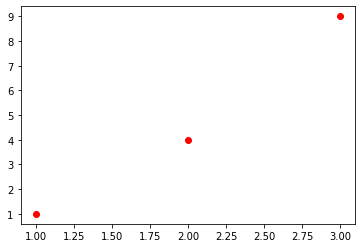

In [282]:
# Jednostavan ali mocan metod je *plot*.

x = np.array([1,2,3])
y = x**2
plt.plot(x, y, "ro")

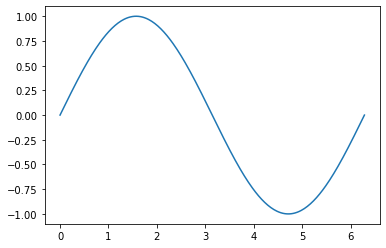

In [283]:
x = np.linspace(0, 2*np.pi, 300)
y = np.sin(x)
plt.plot(x, y)

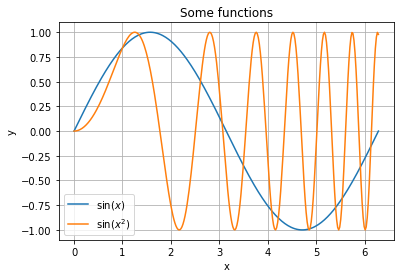

In [285]:
# Plot koji sadrzi nazive osa i legendu

x = np.linspace(0, 2*np.pi, 300)
y = np.sin(x)
y2 = np.sin(x**2)
plt.plot(x, y, label=r'$\sin(x)$')
plt.plot(x, y2, label=r'$\sin(x^2)$')
plt.title('Some functions')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

C:\Users\Slavenka\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys


(-2, 2)

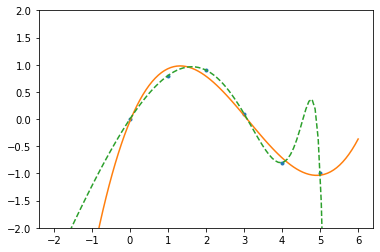

In [288]:
# numpy takodje omogucava jednostavnije regresije, kao sto je least squares polynomial fitting.

x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
p30 = np.poly1d(np.polyfit(x, y, 30))
xp = np.linspace(-2, 6, 100)
plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '--')
plt.ylim(-2,2)

C:\Users\Slavenka\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


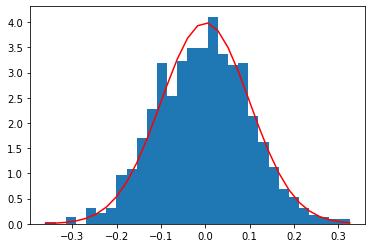

In [293]:
# histogram

# koeficijenti distribucije
mu, sigma = 0, 0.1
# vrijednosti semplovane iz distribucije
s = np.random.normal(mu, sigma, 1000)
# plotaj binove
count, bins, ignored = plt.hist(s, 30, normed=True)
# plotaj distribuciju baziranu na koeficijentima
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), color='r')

Probably the best way to learn about making new plots is looking at the 
<a href="http://matplotlib.sourceforge.net/gallery.html">Matplotlib Gallery</a>.

# Pandas module

In [ ]:
10 minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the Cookbook.

Customarily, we import as follows:

In [1]: import numpy as np

In [2]: import pandas as pd

Object creation

See the Data Structure Intro section.

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]: s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [4]: s
Out[4]: 
0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [5]: dates = pd.date_range('20130101', periods=6)

In [6]: dates
Out[6]: 
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]: df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [8]: df
Out[8]: 
                   A         B         C         D
2013-01-01  0.469112 -0.282863 -1.509059 -1.135632
2013-01-02  1.212112 -0.173215  0.119209 -1.044236
2013-01-03 -0.861849 -2.104569 -0.494929  1.071804
2013-01-04  0.721555 -0.706771 -1.039575  0.271860
2013-01-05 -0.424972  0.567020  0.276232 -1.087401
2013-01-06 -0.673690  0.113648 -1.478427  0.524988

Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [9]: df2 = pd.DataFrame({'A': 1.,
   ...:                     'B': pd.Timestamp('20130102'),
   ...:                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
   ...:                     'D': np.array([3] * 4, dtype='int32'),
   ...:                     'E': pd.Categorical(["test", "train", "test", "train"]),
   ...:                     'F': 'foo'})
   ...: 

In [10]: df2
Out[10]: 
     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

The columns of the resulting DataFrame have different dtypes.

In [11]: df2.dtypes
Out[11]: 
A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [12]: df2.<TAB>  # noqa: E225, E999
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.clip_lower
df2.align              df2.clip_upper
df2.all                df2.columns
df2.any                df2.combine
df2.append             df2.combine_first
df2.apply              df2.compound
df2.applymap           df2.consolidate
df2.D

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.
Viewing data

See the Basics section.

Here is how to view the top and bottom rows of the frame:

In [13]: df.head()
Out[13]: 
                   A         B         C         D
2013-01-01  0.469112 -0.282863 -1.509059 -1.135632
2013-01-02  1.212112 -0.173215  0.119209 -1.044236
2013-01-03 -0.861849 -2.104569 -0.494929  1.071804
2013-01-04  0.721555 -0.706771 -1.039575  0.271860
2013-01-05 -0.424972  0.567020  0.276232 -1.087401

In [14]: df.tail(3)
Out[14]: 
                   A         B         C         D
2013-01-04  0.721555 -0.706771 -1.039575  0.271860
2013-01-05 -0.424972  0.567020  0.276232 -1.087401
2013-01-06 -0.673690  0.113648 -1.478427  0.524988

Display the index, columns:

In [15]: df.index
Out[15]: 
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]: df.columns
Out[16]: Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

In [17]: df.to_numpy()
Out[17]: 
array([[ 0.4691, -0.2829, -1.5091, -1.1356],
       [ 1.2121, -0.1732,  0.1192, -1.0442],
       [-0.8618, -2.1046, -0.4949,  1.0718],
       [ 0.7216, -0.7068, -1.0396,  0.2719],
       [-0.425 ,  0.567 ,  0.2762, -1.0874],
       [-0.6737,  0.1136, -1.4784,  0.525 ]])

For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive.

In [18]: df2.to_numpy()
Out[18]: 
array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

Note

DataFrame.to_numpy() does not include the index or column labels in the output.

describe() shows a quick statistic summary of your data:

In [19]: df.describe()
Out[19]: 
              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.073711 -0.431125 -0.687758 -0.233103
std    0.843157  0.922818  0.779887  0.973118
min   -0.861849 -2.104569 -1.509059 -1.135632
25%   -0.611510 -0.600794 -1.368714 -1.076610
50%    0.022070 -0.228039 -0.767252 -0.386188
75%    0.658444  0.041933 -0.034326  0.461706
max    1.212112  0.567020  0.276232  1.071804

Transposing your data:

In [20]: df.T
Out[20]: 
   2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A    0.469112    1.212112   -0.861849    0.721555   -0.424972   -0.673690
B   -0.282863   -0.173215   -2.104569   -0.706771    0.567020    0.113648
C   -1.509059    0.119209   -0.494929   -1.039575    0.276232   -1.478427
D   -1.135632   -1.044236    1.071804    0.271860   -1.087401    0.524988

Sorting by an axis:

In [21]: df.sort_index(axis=1, ascending=False)
Out[21]: 
                   D         C         B         A
2013-01-01 -1.135632 -1.509059 -0.282863  0.469112
2013-01-02 -1.044236  0.119209 -0.173215  1.212112
2013-01-03  1.071804 -0.494929 -2.104569 -0.861849
2013-01-04  0.271860 -1.039575 -0.706771  0.721555
2013-01-05 -1.087401  0.276232  0.567020 -0.424972
2013-01-06  0.524988 -1.478427  0.113648 -0.673690

Sorting by values:

In [22]: df.sort_values(by='B')
Out[22]: 
                   A         B         C         D
2013-01-03 -0.861849 -2.104569 -0.494929  1.071804
2013-01-04  0.721555 -0.706771 -1.039575  0.271860
2013-01-01  0.469112 -0.282863 -1.509059 -1.135632
2013-01-02  1.212112 -0.173215  0.119209 -1.044236
2013-01-06 -0.673690  0.113648 -1.478427  0.524988
2013-01-05 -0.424972  0.567020  0.276232 -1.087401

Selection

Note

While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

See the indexing documentation Indexing and Selecting Data and MultiIndex / Advanced Indexing.
Getting

Selecting a single column, which yields a Series, equivalent to df.A:

In [23]: df['A']
Out[23]: 
2013-01-01    0.469112
2013-01-02    1.212112
2013-01-03   -0.861849
2013-01-04    0.721555
2013-01-05   -0.424972
2013-01-06   -0.673690
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [24]: df[0:3]
Out[24]: 
                   A         B         C         D
2013-01-01  0.469112 -0.282863 -1.509059 -1.135632
2013-01-02  1.212112 -0.173215  0.119209 -1.044236
2013-01-03 -0.861849 -2.104569 -0.494929  1.071804

In [25]: df['20130102':'20130104']
Out[25]: 
                   A         B         C         D
2013-01-02  1.212112 -0.173215  0.119209 -1.044236
2013-01-03 -0.861849 -2.104569 -0.494929  1.071804
2013-01-04  0.721555 -0.706771 -1.039575  0.271860

Selection by label

See more in Selection by Label.

For getting a cross section using a label:

In [26]: df.loc[dates[0]]
Out[26]: 
A    0.469112
B   -0.282863
C   -1.509059
D   -1.135632
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [27]: df.loc[:, ['A', 'B']]
Out[27]: 
                   A         B
2013-01-01  0.469112 -0.282863
2013-01-02  1.212112 -0.173215
2013-01-03 -0.861849 -2.104569
2013-01-04  0.721555 -0.706771
2013-01-05 -0.424972  0.567020
2013-01-06 -0.673690  0.113648

Showing label slicing, both endpoints are included:

In [28]: df.loc['20130102':'20130104', ['A', 'B']]
Out[28]: 
                   A         B
2013-01-02  1.212112 -0.173215
2013-01-03 -0.861849 -2.104569
2013-01-04  0.721555 -0.706771

Reduction in the dimensions of the returned object:

In [29]: df.loc['20130102', ['A', 'B']]
Out[29]: 
A    1.212112
B   -0.173215
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [30]: df.loc[dates[0], 'A']
Out[30]: 0.4691122999071863

For getting fast access to a scalar (equivalent to the prior method):

In [31]: df.at[dates[0], 'A']
Out[31]: 0.4691122999071863

Selection by position

See more in Selection by Position.

Select via the position of the passed integers:

In [32]: df.iloc[3]
Out[32]: 
A    0.721555
B   -0.706771
C   -1.039575
D    0.271860
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [33]: df.iloc[3:5, 0:2]
Out[33]: 
                   A         B
2013-01-04  0.721555 -0.706771
2013-01-05 -0.424972  0.567020

By lists of integer position locations, similar to the numpy/python style:

In [34]: df.iloc[[1, 2, 4], [0, 2]]
Out[34]: 
                   A         C
2013-01-02  1.212112  0.119209
2013-01-03 -0.861849 -0.494929
2013-01-05 -0.424972  0.276232

For slicing rows explicitly:

In [35]: df.iloc[1:3, :]
Out[35]: 
                   A         B         C         D
2013-01-02  1.212112 -0.173215  0.119209 -1.044236
2013-01-03 -0.861849 -2.104569 -0.494929  1.071804

For slicing columns explicitly:

In [36]: df.iloc[:, 1:3]
Out[36]: 
                   B         C
2013-01-01 -0.282863 -1.509059
2013-01-02 -0.173215  0.119209
2013-01-03 -2.104569 -0.494929
2013-01-04 -0.706771 -1.039575
2013-01-05  0.567020  0.276232
2013-01-06  0.113648 -1.478427

For getting a value explicitly:

In [37]: df.iloc[1, 1]
Out[37]: -0.17321464905330858

For getting fast access to a scalar (equivalent to the prior method):

In [38]: df.iat[1, 1]
Out[38]: -0.17321464905330858

Boolean indexing

Using a single column’s values to select data.

In [39]: df[df.A > 0]
Out[39]: 
                   A         B         C         D
2013-01-01  0.469112 -0.282863 -1.509059 -1.135632
2013-01-02  1.212112 -0.173215  0.119209 -1.044236
2013-01-04  0.721555 -0.706771 -1.039575  0.271860

Selecting values from a DataFrame where a boolean condition is met.

In [40]: df[df > 0]
Out[40]: 
                   A         B         C         D
2013-01-01  0.469112       NaN       NaN       NaN
2013-01-02  1.212112       NaN  0.119209       NaN
2013-01-03       NaN       NaN       NaN  1.071804
2013-01-04  0.721555       NaN       NaN  0.271860
2013-01-05       NaN  0.567020  0.276232       NaN
2013-01-06       NaN  0.113648       NaN  0.524988

Using the isin() method for filtering:

In [41]: df2 = df.copy()

In [42]: df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [43]: df2
Out[43]: 
                   A         B         C         D      E
2013-01-01  0.469112 -0.282863 -1.509059 -1.135632    one
2013-01-02  1.212112 -0.173215  0.119209 -1.044236    one
2013-01-03 -0.861849 -2.104569 -0.494929  1.071804    two
2013-01-04  0.721555 -0.706771 -1.039575  0.271860  three
2013-01-05 -0.424972  0.567020  0.276232 -1.087401   four
2013-01-06 -0.673690  0.113648 -1.478427  0.524988  three

In [44]: df2[df2['E'].isin(['two', 'four'])]
Out[44]: 
                   A         B         C         D     E
2013-01-03 -0.861849 -2.104569 -0.494929  1.071804   two
2013-01-05 -0.424972  0.567020  0.276232 -1.087401  four

Setting

Setting a new column automatically aligns the data by the indexes.

In [45]: s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))

In [46]: s1
Out[46]: 
2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [47]: df['F'] = s1

Setting values by label:

In [48]: df.at[dates[0], 'A'] = 0

Setting values by position:

In [49]: df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [50]: df.loc[:, 'D'] = np.array([5] * len(df))

The result of the prior setting operations.

In [51]: df
Out[51]: 
                   A         B         C  D    F
2013-01-01  0.000000  0.000000 -1.509059  5  NaN
2013-01-02  1.212112 -0.173215  0.119209  5  1.0
2013-01-03 -0.861849 -2.104569 -0.494929  5  2.0
2013-01-04  0.721555 -0.706771 -1.039575  5  3.0
2013-01-05 -0.424972  0.567020  0.276232  5  4.0
2013-01-06 -0.673690  0.113648 -1.478427  5  5.0

A where operation with setting.

In [52]: df2 = df.copy()

In [53]: df2[df2 > 0] = -df2

In [54]: df2
Out[54]: 
                   A         B         C  D    F
2013-01-01  0.000000  0.000000 -1.509059 -5  NaN
2013-01-02 -1.212112 -0.173215 -0.119209 -5 -1.0
2013-01-03 -0.861849 -2.104569 -0.494929 -5 -2.0
2013-01-04 -0.721555 -0.706771 -1.039575 -5 -3.0
2013-01-05 -0.424972 -0.567020 -0.276232 -5 -4.0
2013-01-06 -0.673690 -0.113648 -1.478427 -5 -5.0

Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [55]: df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [56]: df1.loc[dates[0]:dates[1], 'E'] = 1

In [57]: df1
Out[57]: 
                   A         B         C  D    F    E
2013-01-01  0.000000  0.000000 -1.509059  5  NaN  1.0
2013-01-02  1.212112 -0.173215  0.119209  5  1.0  1.0
2013-01-03 -0.861849 -2.104569 -0.494929  5  2.0  NaN
2013-01-04  0.721555 -0.706771 -1.039575  5  3.0  NaN

To drop any rows that have missing data.

In [58]: df1.dropna(how='any')
Out[58]: 
                   A         B         C  D    F    E
2013-01-02  1.212112 -0.173215  0.119209  5  1.0  1.0

Filling missing data.

In [59]: df1.fillna(value=5)
Out[59]: 
                   A         B         C  D    F    E
2013-01-01  0.000000  0.000000 -1.509059  5  5.0  1.0
2013-01-02  1.212112 -0.173215  0.119209  5  1.0  1.0
2013-01-03 -0.861849 -2.104569 -0.494929  5  2.0  5.0
2013-01-04  0.721555 -0.706771 -1.039575  5  3.0  5.0

To get the boolean mask where values are nan.

In [60]: pd.isna(df1)
Out[60]: 
                A      B      C      D      F      E
2013-01-01  False  False  False  False   True  False
2013-01-02  False  False  False  False  False  False
2013-01-03  False  False  False  False  False   True
2013-01-04  False  False  False  False  False   True

Operations

See the Basic section on Binary Ops.
Stats

Operations in general exclude missing data.

Performing a descriptive statistic:

In [61]: df.mean()
Out[61]: 
A   -0.004474
B   -0.383981
C   -0.687758
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [62]: df.mean(1)
Out[62]: 
2013-01-01    0.872735
2013-01-02    1.431621
2013-01-03    0.707731
2013-01-04    1.395042
2013-01-05    1.883656
2013-01-06    1.592306
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [63]: s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [64]: s
Out[64]: 
2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [65]: df.sub(s, axis='index')
Out[65]: 
                   A         B         C    D    F
2013-01-01       NaN       NaN       NaN  NaN  NaN
2013-01-02       NaN       NaN       NaN  NaN  NaN
2013-01-03 -1.861849 -3.104569 -1.494929  4.0  1.0
2013-01-04 -2.278445 -3.706771 -4.039575  2.0  0.0
2013-01-05 -5.424972 -4.432980 -4.723768  0.0 -1.0
2013-01-06       NaN       NaN       NaN  NaN  NaN

Apply

Applying functions to the data:

In [66]: df.apply(np.cumsum)
Out[66]: 
                   A         B         C   D     F
2013-01-01  0.000000  0.000000 -1.509059   5   NaN
2013-01-02  1.212112 -0.173215 -1.389850  10   1.0
2013-01-03  0.350263 -2.277784 -1.884779  15   3.0
2013-01-04  1.071818 -2.984555 -2.924354  20   6.0
2013-01-05  0.646846 -2.417535 -2.648122  25  10.0
2013-01-06 -0.026844 -2.303886 -4.126549  30  15.0

In [67]: df.apply(lambda x: x.max() - x.min())
Out[67]: 
A    2.073961
B    2.671590
C    1.785291
D    0.000000
F    4.000000
dtype: float64

Histogramming

See more at Histogramming and Discretization.

In [68]: s = pd.Series(np.random.randint(0, 7, size=10))

In [69]: s
Out[69]: 
0    4
1    2
2    1
3    2
4    6
5    4
6    4
7    6
8    4
9    4
dtype: int64

In [70]: s.value_counts()
Out[70]: 
4    5
6    2
2    2
1    1
dtype: int64

String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.

In [71]: s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [72]: s.str.lower()
Out[72]: 
0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

Merge
Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the Merging section.

Concatenating pandas objects together with concat():

In [73]: df = pd.DataFrame(np.random.randn(10, 4))

In [74]: df
Out[74]: 
          0         1         2         3
0 -0.548702  1.467327 -1.015962 -0.483075
1  1.637550 -1.217659 -0.291519 -1.745505
2 -0.263952  0.991460 -0.919069  0.266046
3 -0.709661  1.669052  1.037882 -1.705775
4 -0.919854 -0.042379  1.247642 -0.009920
5  0.290213  0.495767  0.362949  1.548106
6 -1.131345 -0.089329  0.337863 -0.945867
7 -0.932132  1.956030  0.017587 -0.016692
8 -0.575247  0.254161 -1.143704  0.215897
9  1.193555 -0.077118 -0.408530 -0.862495

# break it into pieces
In [75]: pieces = [df[:3], df[3:7], df[7:]]

In [76]: pd.concat(pieces)
Out[76]: 
          0         1         2         3
0 -0.548702  1.467327 -1.015962 -0.483075
1  1.637550 -1.217659 -0.291519 -1.745505
2 -0.263952  0.991460 -0.919069  0.266046
3 -0.709661  1.669052  1.037882 -1.705775
4 -0.919854 -0.042379  1.247642 -0.009920
5  0.290213  0.495767  0.362949  1.548106
6 -1.131345 -0.089329  0.337863 -0.945867
7 -0.932132  1.956030  0.017587 -0.016692
8 -0.575247  0.254161 -1.143704  0.215897
9  1.193555 -0.077118 -0.408530 -0.862495

Join

SQL style merges. See the Database style joining section.

In [77]: left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [78]: right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [79]: left
Out[79]: 
   key  lval
0  foo     1
1  foo     2

In [80]: right
Out[80]: 
   key  rval
0  foo     4
1  foo     5

In [81]: pd.merge(left, right, on='key')
Out[81]: 
   key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5

Another example that can be given is:

In [82]: left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

In [83]: right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [84]: left
Out[84]: 
   key  lval
0  foo     1
1  bar     2

In [85]: right
Out[85]: 
   key  rval
0  foo     4
1  bar     5

In [86]: pd.merge(left, right, on='key')
Out[86]: 
   key  lval  rval
0  foo     1     4
1  bar     2     5

Append

Append rows to a dataframe. See the Appending section.

In [87]: df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [88]: df
Out[88]: 
          A         B         C         D
0  1.346061  1.511763  1.627081 -0.990582
1 -0.441652  1.211526  0.268520  0.024580
2 -1.577585  0.396823 -0.105381 -0.532532
3  1.453749  1.208843 -0.080952 -0.264610
4 -0.727965 -0.589346  0.339969 -0.693205
5 -0.339355  0.593616  0.884345  1.591431
6  0.141809  0.220390  0.435589  0.192451
7 -0.096701  0.803351  1.715071 -0.708758

In [89]: s = df.iloc[3]

In [90]: df.append(s, ignore_index=True)
Out[90]: 
          A         B         C         D
0  1.346061  1.511763  1.627081 -0.990582
1 -0.441652  1.211526  0.268520  0.024580
2 -1.577585  0.396823 -0.105381 -0.532532
3  1.453749  1.208843 -0.080952 -0.264610
4 -0.727965 -0.589346  0.339969 -0.693205
5 -0.339355  0.593616  0.884345  1.591431
6  0.141809  0.220390  0.435589  0.192451
7 -0.096701  0.803351  1.715071 -0.708758
8  1.453749  1.208843 -0.080952 -0.264610

Grouping

By “group by” we are referring to a process involving one or more of the following steps:

        Splitting the data into groups based on some criteria
        Applying a function to each group independently
        Combining the results into a data structure

See the Grouping section.

In [91]: df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
   ....:                          'foo', 'bar', 'foo', 'foo'],
   ....:                    'B': ['one', 'one', 'two', 'three',
   ....:                          'two', 'two', 'one', 'three'],
   ....:                    'C': np.random.randn(8),
   ....:                    'D': np.random.randn(8)})
   ....: 

In [92]: df
Out[92]: 
     A      B         C         D
0  foo    one -1.202872 -0.055224
1  bar    one -1.814470  2.395985
2  foo    two  1.018601  1.552825
3  bar  three -0.595447  0.166599
4  foo    two  1.395433  0.047609
5  bar    two -0.392670 -0.136473
6  foo    one  0.007207 -0.561757
7  foo  three  1.928123 -1.623033

Grouping and then applying the sum() function to the resulting groups.

In [93]: df.groupby('A').sum()
Out[93]: 
            C        D
A                     
bar -2.802588  2.42611
foo  3.146492 -0.63958

Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [94]: df.groupby(['A', 'B']).sum()
Out[94]: 
                  C         D
A   B                        
bar one   -1.814470  2.395985
    three -0.595447  0.166599
    two   -0.392670 -0.136473
foo one   -1.195665 -0.616981
    three  1.928123 -1.623033
    two    2.414034  1.600434

Reshaping

See the sections on Hierarchical Indexing and Reshaping.
Stack

In [95]: tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
   ....: 

In [96]: index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [97]: df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [98]: df2 = df[:4]

In [99]: df2
Out[99]: 
                     A         B
first second                    
bar   one     0.029399 -0.542108
      two     0.282696 -0.087302
baz   one    -1.575170  1.771208
      two     0.816482  1.100230

The stack() method “compresses” a level in the DataFrame’s columns.

In [100]: stacked = df2.stack()

In [101]: stacked
Out[101]: 
first  second   
bar    one     A    0.029399
               B   -0.542108
       two     A    0.282696
               B   -0.087302
baz    one     A   -1.575170
               B    1.771208
       two     A    0.816482
               B    1.100230
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [102]: stacked.unstack()
Out[102]: 
                     A         B
first second                    
bar   one     0.029399 -0.542108
      two     0.282696 -0.087302
baz   one    -1.575170  1.771208
      two     0.816482  1.100230

In [103]: stacked.unstack(1)
Out[103]: 
second        one       two
first                      
bar   A  0.029399  0.282696
      B -0.542108 -0.087302
baz   A -1.575170  0.816482
      B  1.771208  1.100230

In [104]: stacked.unstack(0)
Out[104]: 
first          bar       baz
second                      
one    A  0.029399 -1.575170
       B -0.542108  1.771208
two    A  0.282696  0.816482
       B -0.087302  1.100230

Pivot tables

See the section on Pivot Tables.

In [105]: df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B': ['A', 'B', 'C'] * 4,
   .....:                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D': np.random.randn(12),
   .....:                    'E': np.random.randn(12)})
   .....: 

In [106]: df
Out[106]: 
        A  B    C         D         E
0     one  A  foo  1.418757 -0.179666
1     one  B  foo -1.879024  1.291836
2     two  C  foo  0.536826 -0.009614
3   three  A  bar  1.006160  0.392149
4     one  B  bar -0.029716  0.264599
5     one  C  bar -1.146178 -0.057409
6     two  A  foo  0.100900 -1.425638
7   three  B  foo -1.035018  1.024098
8     one  C  foo  0.314665 -0.106062
9     one  A  bar -0.773723  1.824375
10    two  B  bar -1.170653  0.595974
11  three  C  bar  0.648740  1.167115

We can produce pivot tables from this data very easily:

In [107]: pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])
Out[107]: 
C             bar       foo
A     B                    
one   A -0.773723  1.418757
      B -0.029716 -1.879024
      C -1.146178  0.314665
three A  1.006160       NaN
      B       NaN -1.035018
      C  0.648740       NaN
two   A       NaN  0.100900
      B -1.170653       NaN
      C       NaN  0.536826

Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section.

In [108]: rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [109]: ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [110]: ts.resample('5Min').sum()
Out[110]: 
2012-01-01    25083
Freq: 5T, dtype: int64

Time zone representation:

In [111]: rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [112]: ts = pd.Series(np.random.randn(len(rng)), rng)

In [113]: ts
Out[113]: 
2012-03-06    0.464000
2012-03-07    0.227371
2012-03-08   -0.496922
2012-03-09    0.306389
2012-03-10   -2.290613
Freq: D, dtype: float64

In [114]: ts_utc = ts.tz_localize('UTC')

In [115]: ts_utc
Out[115]: 
2012-03-06 00:00:00+00:00    0.464000
2012-03-07 00:00:00+00:00    0.227371
2012-03-08 00:00:00+00:00   -0.496922
2012-03-09 00:00:00+00:00    0.306389
2012-03-10 00:00:00+00:00   -2.290613
Freq: D, dtype: float64

Converting to another time zone:

In [116]: ts_utc.tz_convert('US/Eastern')
Out[116]: 
2012-03-05 19:00:00-05:00    0.464000
2012-03-06 19:00:00-05:00    0.227371
2012-03-07 19:00:00-05:00   -0.496922
2012-03-08 19:00:00-05:00    0.306389
2012-03-09 19:00:00-05:00   -2.290613
Freq: D, dtype: float64

Converting between time span representations:

In [117]: rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [118]: ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [119]: ts
Out[119]: 
2012-01-31   -1.134623
2012-02-29   -1.561819
2012-03-31   -0.260838
2012-04-30    0.281957
2012-05-31    1.523962
Freq: M, dtype: float64

In [120]: ps = ts.to_period()

In [121]: ps
Out[121]: 
2012-01   -1.134623
2012-02   -1.561819
2012-03   -0.260838
2012-04    0.281957
2012-05    1.523962
Freq: M, dtype: float64

In [122]: ps.to_timestamp()
Out[122]: 
2012-01-01   -1.134623
2012-02-01   -1.561819
2012-03-01   -0.260838
2012-04-01    0.281957
2012-05-01    1.523962
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [123]: prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [124]: ts = pd.Series(np.random.randn(len(prng)), prng)

In [125]: ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [126]: ts.head()
Out[126]: 
1990-03-01 09:00   -0.902937
1990-06-01 09:00    0.068159
1990-09-01 09:00   -0.057873
1990-12-01 09:00   -0.368204
1991-03-01 09:00   -1.144073
Freq: H, dtype: float64

Categoricals

pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [127]: df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
   .....:                    "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
   .....: 

Convert the raw grades to a categorical data type.

In [128]: df["grade"] = df["raw_grade"].astype("category")

In [129]: df["grade"]
Out[129]: 
0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).

In [130]: df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series by default).

In [131]: df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
   .....:                                               "good", "very good"])
   .....: 

In [132]: df["grade"]
Out[132]: 
0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [133]: df.sort_values(by="grade")
Out[133]: 
   id raw_grade      grade
5   6         e   very bad
1   2         b       good
2   3         b       good
0   1         a  very good
3   4         a  very good
4   5         a  very good

Grouping by a categorical column also shows empty categories.

In [134]: df.groupby("grade").size()
Out[134]: 
grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

Plotting

See the Plotting docs.

In [135]: ts = pd.Series(np.random.randn(1000),
   .....:                index=pd.date_range('1/1/2000', periods=1000))
   .....: 

In [136]: ts = ts.cumsum()

In [137]: ts.plot()
Out[137]: <matplotlib.axes._subplots.AxesSubplot at 0x7f24a8b314d0>

../_images/series_plot_basic.png

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

In [138]: df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])
   .....: 

In [139]: df = df.cumsum()

In [140]: plt.figure()
Out[140]: <Figure size 640x480 with 0 Axes>

In [141]: df.plot()
Out[141]: <matplotlib.axes._subplots.AxesSubplot at 0x7f24a8b13750>

In [142]: plt.legend(loc='best')
Out[142]: <matplotlib.legend.Legend at 0x7f24a88250d0>

../_images/frame_plot_basic.png
Getting data in/out
CSV

Writing to a csv file.

In [143]: df.to_csv('foo.csv')

Reading from a csv file.

In [144]: pd.read_csv('foo.csv')
Out[144]: 
     Unnamed: 0          A          B         C          D
0    2000-01-01   0.266457  -0.399641 -0.219582   1.186860
1    2000-01-02  -1.170732  -0.345873  1.653061  -0.282953
2    2000-01-03  -1.734933   0.530468  2.060811  -0.515536
3    2000-01-04  -1.555121   1.452620  0.239859  -1.156896
4    2000-01-05   0.578117   0.511371  0.103552  -2.428202
..          ...        ...        ...       ...        ...
995  2002-09-22  -8.985362  -8.485624 -4.669462  31.367740
996  2002-09-23  -9.558560  -8.781216 -4.499815  30.518439
997  2002-09-24  -9.902058  -9.340490 -4.386639  30.105593
998  2002-09-25 -10.216020  -9.480682 -3.933802  29.758560
999  2002-09-26 -11.856774 -10.671012 -3.216025  29.369368

[1000 rows x 5 columns]

HDF5

Reading and writing to HDFStores.

Writing to a HDF5 Store.

In [145]: df.to_hdf('foo.h5', 'df')

Reading from a HDF5 Store.

In [146]: pd.read_hdf('foo.h5', 'df')
Out[146]: 
                    A          B         C          D
2000-01-01   0.266457  -0.399641 -0.219582   1.186860
2000-01-02  -1.170732  -0.345873  1.653061  -0.282953
2000-01-03  -1.734933   0.530468  2.060811  -0.515536
2000-01-04  -1.555121   1.452620  0.239859  -1.156896
2000-01-05   0.578117   0.511371  0.103552  -2.428202
...               ...        ...       ...        ...
2002-09-22  -8.985362  -8.485624 -4.669462  31.367740
2002-09-23  -9.558560  -8.781216 -4.499815  30.518439
2002-09-24  -9.902058  -9.340490 -4.386639  30.105593
2002-09-25 -10.216020  -9.480682 -3.933802  29.758560
2002-09-26 -11.856774 -10.671012 -3.216025  29.369368

[1000 rows x 4 columns]

Excel

Reading and writing to MS Excel.

Writing to an excel file.

In [147]: df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file.

In [148]: pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
Out[148]: 
    Unnamed: 0          A          B         C          D
0   2000-01-01   0.266457  -0.399641 -0.219582   1.186860
1   2000-01-02  -1.170732  -0.345873  1.653061  -0.282953
2   2000-01-03  -1.734933   0.530468  2.060811  -0.515536
3   2000-01-04  -1.555121   1.452620  0.239859  -1.156896
4   2000-01-05   0.578117   0.511371  0.103552  -2.428202
..         ...        ...        ...       ...        ...
995 2002-09-22  -8.985362  -8.485624 -4.669462  31.367740
996 2002-09-23  -9.558560  -8.781216 -4.499815  30.518439
997 2002-09-24  -9.902058  -9.340490 -4.386639  30.105593
998 2002-09-25 -10.216020  -9.480682 -3.933802  29.758560
999 2002-09-26 -11.856774 -10.671012 -3.216025  29.369368

[1000 rows x 5 columns]

Gotchas

If you are attempting to perform an operation you might see an exception like:

>>> if pd.Series([False, True, False]):
...     print("I was true")
Traceback
    ...
ValueError: The truth value of an array is ambiguous. Use a.empty, a.any() or a.all().

See Comparisons for an explanation and what to do.

See Gotchas as well.

    index
    modules |
    next |
    previous |
    pandas 0.25.1 documentation » Getting started » 

